### Loading libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example 1

### Step 1: Loading datset

In [17]:
data = pd.read_csv('Logistic_data.csv')
data.head()

,X1,X2,y
0,0.0513,0.6996,1
1,-0.0927,0.6849,1
2,-0.2137,0.6923,1
3,-0.3750,0.5022,1
4,-0.5132,0.4656,1


### Step 2: Define features (X_train), and labels (y_train)

In [18]:
X_train = data.iloc[:, 0:-1].values
y_train = data.iloc[:, -1].values

print(X_train.shape)
print(y_train.shape)

(118, 2)
(118,)


### Step 3: Split the data into train and test data and vectorization

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(94, 2)
(94,)
(24, 2)
(24,)


In [20]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, len(y_train))
y_test = y_test.reshape(1, len(y_test))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2, 94)
(1, 94)
(2, 24)
(1, 24)


### Step 4: Model fit (Cost and Gradient descent)

In [21]:
### Segmoid function

def segmoid(x):
    return 1/(1+np.exp(-x))

### Logistic Regression Model

def model(X, y, learning_rate, iterations):
    
    m = X.shape[1]
    n = X.shape[0]
    
    w = np.zeros((n, 1))
    b = 0
    
    cost_his = []
    
    for i in range(iterations):
        
        z = np.dot(w.T, X) + b
        A = segmoid(z)
        
        cost = -(1/m) * np.sum(y * np.log(A) + (1-y) * np.log(1-A))
        
        dw = (1/m)*np.dot(A-y, X.T)
        db = (1/m)*np.sum(A-y)
        
        w -= learning_rate * dw.T
        b -= learning_rate * db
        cost_his.append(cost)
        if(i%(iterations/10) == 0):
            print('Cost after ', i, 'iteration is :', cost)
            
    return w, b, cost_his

In [26]:
### Model fit

learning_rate = 0.0015
iterations = 100000

w, b, cost_his = model(X_train, y_train, learning_rate=learning_rate, iterations=iterations)

Cost after  0 iteration is : 0.6931471805599454
Cost after  10000 iteration is : 0.689581032838998
Cost after  20000 iteration is : 0.6889665068669296
Cost after  30000 iteration is : 0.6888432120603608
Cost after  40000 iteration is : 0.6888177053265412
Cost after  50000 iteration is : 0.6888123358690306
Cost after  60000 iteration is : 0.6888111945243844
Cost after  70000 iteration is : 0.6888109506205612
Cost after  80000 iteration is : 0.6888108983464084
Cost after  90000 iteration is : 0.6888108871250093


### Step 5: Cheking Gradient descent

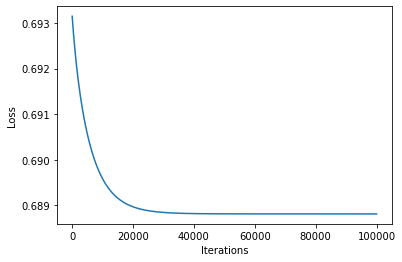

In [27]:
rng = np.arange(iterations)
plt.plot(rng, cost_his)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Step 6: Prediction

In [28]:
def accuracy(X,y,w,b):
    z = np.dot(w.T, X) + b
    A = segmoid(z)
    
    A = A>0.5
    A = np.array(A, dtype = 'int64')
    
    acc = (1-np.sum(np.absolute(A-y))/y.shape[1])*100
    print('Accuracy of the model is :', acc, '%')

In [29]:
accuracy(X_test, y_test, w, b)

Accuracy of the model is : 50.0 %


# Example 2

### Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Loading dataset

In [31]:
data1 = pd.read_csv('titanic_X_train.csv')
data1.head()

,ID,Pclass,Sex,Age,SibSp,Parch,Fare,Embarced
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [32]:
data2 = pd.read_csv('titanic_y_train.csv')
data2.head()

,ID,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


### Step 2: Define features (X_train), and labels (y_train)

In [33]:
X = data1.iloc[:, 1:].values
y = data2.iloc[:, 1].values
print(X.shape)
print(y.shape)

(891, 7)
(891,)


### Step 3: Split the data into train and test data and vectorization

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [35]:
### Vectirization

X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, len(y_train))
y_test = y_test.reshape(1, len(y_test))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7, 712)
(1, 712)
(7, 179)
(1, 179)


### Step 4: Model fit (Cost and Gradient descent)

In [36]:
### Segmoid function

def segmoid(x):
    return 1/(1+np.exp(-x))

### Logistic Regression Model

def model(X, y, learning_rate, iterations):
    
    m = X.shape[1]
    n = X.shape[0]
    
    w = np.zeros((n, 1))
    b = 0
    
    cost_his = []
    
    for i in range(iterations):
        
        z = np.dot(w.T, X) + b
        A = segmoid(z)
        
        cost = -(1/m) * np.sum(y * np.log(A) + (1-y) * np.log(1-A))
        
        dw = (1/m)*np.dot(A-y, X.T)
        db = (1/m)*np.sum(A-y)
        
        w -= learning_rate * dw.T
        b -= learning_rate * db
        cost_his.append(cost)
        if(i%(iterations/10) == 0):
            print('Cost after ', i, 'iteration is :', cost)
            
    return w, b, cost_his

In [37]:
### Model fit

learning_rate = 0.0015
iterations = 100000

w, b, cost_his = model(X_train, y_train, learning_rate=learning_rate, iterations=iterations)

Cost after  0 iteration is : 0.6931471805599453
Cost after  10000 iteration is : 0.5003422871372615
Cost after  20000 iteration is : 0.4705491317196033
Cost after  30000 iteration is : 0.4608125022716342
Cost after  40000 iteration is : 0.4568848608352926
Cost after  50000 iteration is : 0.45493494080807156
Cost after  60000 iteration is : 0.45375533860729655
Cost after  70000 iteration is : 0.45292126621290507
Cost after  80000 iteration is : 0.45226957477192403
Cost after  90000 iteration is : 0.45173172020065167


### Step 5: Cheking Gradient descent

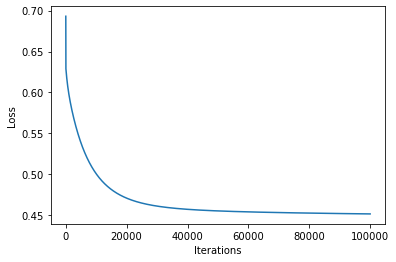

In [38]:
rng = np.arange(iterations)
plt.plot(rng, cost_his)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Step 6: Prediction

In [39]:
def accuracy(X,y,w,b):
    z = np.dot(w.T, X) + b
    A = segmoid(z)
    
    A = A>0.5
    A = np.array(A, dtype = 'int64')
    
    acc = (1-np.sum(np.absolute(A-y))/y.shape[1])*100
    print('Accuracy of the model is :', acc, '%')

In [40]:
accuracy(X_test, y_test, w, b)

Accuracy of the model is : 78.21229050279331 %
